# Module 4

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import skimage as ski #for different image analysis algorithms
import skimage.filters
import image_analysis as anl
import seaborn as sns; sns.set_style('white'); sns.set_context('notebook')

In [2]:
figfile = "Processed/"

## 4.2 CoM of Point Source

In [3]:
pic = np.zeros([501,501]); pic[250,250] = 1

In [4]:
scale_true = 5 #in nm/pixel
lam = 509 #in nm
ccd_scale = 100 #in nm/pixel
SNr = 10
bkg = 10

In [5]:
simulated = anl.simulator(pic,scale_true,lam,ccd_scale,SNr,bkg)

In [6]:
x_com,y_com = anl.COM(simulated)

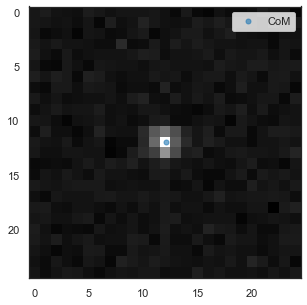

X_CoM: 12.116187417895198 | Y_CoM: 11.948036782951394


In [7]:
plt.figure(figsize = (5,5))
plt.imshow(simulated, cmap = 'gray');
plt.plot(x_com,y_com,'o',alpha = 0.6, markersize = 5)
plt.legend(['CoM'])
plt.savefig(figfile+"CoM_localized_centred.png",dpi=300)
plt.show()
print('X_CoM:', x_com, '| Y_CoM:', y_com)

Background noise has a huge effect on CoM location.

## 4.3 Centroid error vs. Noise

### For Centered Point Source

1\. Centered Image

In [8]:
pic = np.zeros([501,501]); pic[250,250] = 1

2\. RMS error vs. Background Noise

In [9]:
bkg_v = np.arange(0,10,0.05)

In [10]:
rmse = np.zeros(np.shape(bkg_v))
for i,bk in enumerate(bkg_v):
    simulated = anl.simulator(pic,scale_true,lam,ccd_scale,SNr,bk)
    x_com,y_com = anl.COM(simulated)
    y_ccd_point, x_ccd_point = anl.transform_ccd_coords(pic,scale_true,ccd_scale,250,250)
    rmse[i] = np.sqrt((x_com-x_ccd_point)**2+(y_com-y_ccd_point)**2)

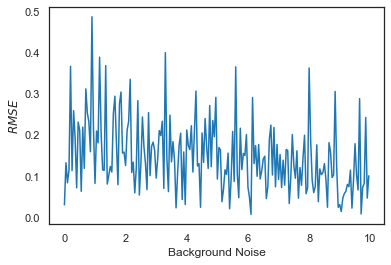

In [11]:
plt.plot(bkg_v,rmse)
plt.xlabel('Background Noise')
plt.ylabel('$RMSE$')
plt.savefig(figfile+"RMSE_vs_bcknoise_centred.png",dpi=300)
plt.show()

2\. RMS error vs. _SNR_

In [12]:
SNr_v = np.arange(0,100,1)

In [13]:
rmse = np.zeros(np.shape(SNr_v))
for i,snr in enumerate(SNr_v):
    simulated = anl.simulator(pic,scale_true,lam,ccd_scale,snr,bkg)
    x_com,y_com = anl.COM(simulated)
    y_ccd_point, x_ccd_point = anl.transform_ccd_coords(pic,scale_true,ccd_scale,250,250)
    rmse[i] = np.sqrt((x_com-x_ccd_point)**2+(y_com-y_ccd_point)**2)

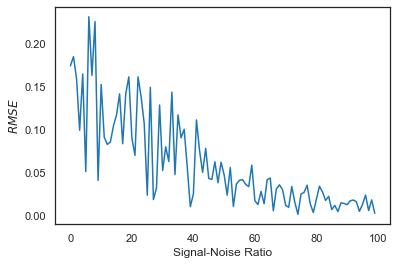

In [14]:
plt.plot(SNr_v,rmse)
plt.xlabel('Signal-Noise Ratio')
plt.ylabel('$RMSE$')
plt.savefig(figfile+"RMSE_vs_SNR_centred.png",dpi=300)
plt.show()

### 4.4 For a Non-centered Point Source

In [15]:
pic = np.zeros([501,501]); pic[200,300] = 1

1\. RMS errror vs. Background Noise

In [16]:
rmse = np.zeros(np.shape(bkg_v))
for i,bk in enumerate(bkg_v):
    simulated = anl.simulator(pic,scale_true,lam,ccd_scale,SNr,bk)
    x_com,y_com = anl.COM(simulated)
    y_ccd_point, x_ccd_point = anl.transform_ccd_coords(pic,scale_true,ccd_scale,200,300)
    rmse[i] = np.sqrt((x_com-x_ccd_point)**2+(y_com-y_ccd_point)**2)

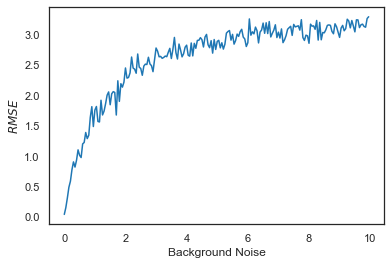

In [17]:
plt.plot(bkg_v,rmse)
plt.xlabel('Background Noise')
plt.ylabel('$RMSE$')
plt.savefig(figfile+"RMSE_vs_bkgnoise_offcentred.png", dpi = 300)
plt.show()

2\. RMS error vs. _SNR_

In [18]:
rmse = np.zeros(np.shape(SNr_v))
for i,snr in enumerate(SNr_v):
    simulated = anl.simulator(pic,scale_true,lam,ccd_scale,snr,bkg)
    x_com,y_com = anl.COM(simulated)
    y_ccd_point, x_ccd_point = anl.transform_ccd_coords(pic,scale_true,ccd_scale,200,300)
    rmse[i] = np.sqrt((x_com-x_ccd_point)**2+(y_com-y_ccd_point)**2)

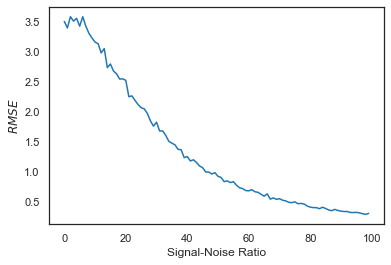

In [19]:
plt.plot(SNr_v,rmse)
plt.xlabel('Signal-Noise Ratio')
plt.ylabel('$RMSE$')
plt.savefig(figfile+"RMSE_vs_SNR_offcentred.png", dpi = 300)
plt.show()

Note that non-centered images seem to be extremely sensitive to SNR and Background Noise. We can try to visualise this for moderate noise and SNR.

In [20]:
simulated = anl.simulator(pic,scale_true,lam,ccd_scale,10,10)
x_com,y_com = anl.COM(simulated)

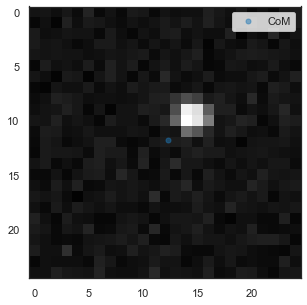

In [21]:
plt.figure(figsize = (5,5))
plt.imshow(simulated, cmap = 'gray');
plt.plot(x_com,y_com,'o',alpha = 0.5,markersize = 5)
plt.legend(['CoM'])
plt.savefig(figfile+"CoM_localized_offcentred.png",dpi=300)
plt.show()

The noise pushed the CoM to the center of the image. The centroid is a bad measure with even small amounts of noise.

# MLE - Gaussian Fitting
## Centred Point Source

In [22]:
pic = np.zeros([501,501]); pic[250,250] = 1
simulated = anl.simulator(pic,scale_true,lam,ccd_scale,SNr,bkg)

In [23]:
A,x0,y0,sigma,offset,_ = anl.gauss2_fit_MLE(simulated)
print('A:', A, '| x0:', x0, '| y0:', y0, '| sigma:', sigma, '| offset:', offset)

Sucess: True
A: 104.80099486251498 | x0: 12.033878433127724 | y0: 12.017952786864258 | sigma: 0.9341381683043893 | offset: 9.761463391340769


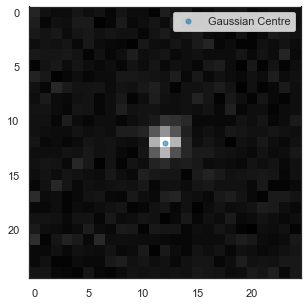

In [24]:
plt.figure(figsize = (5,5))
plt.imshow(simulated, cmap = 'gray');
plt.plot(x0,y0,'o',alpha = 0.6,markersize = 5)
plt.legend(['Gaussian Centre'])
plt.savefig(figfile+"MLE_gaussfit_localized_centred.png",dpi=300)
plt.show()

Calculate _true_ centre of image.

In [25]:
y_ccd_point, x_ccd_point = anl.transform_ccd_coords(pic,scale_true,ccd_scale,250,250)
print('Xtrue:',np.round(x_ccd_point,decimals = 3), '| Ytrue:',np.round(y_ccd_point,decimals = 3))

Xtrue: 12.025 | Ytrue: 12.025


Neat! Similar to CoM.

## Non-Centred Point Source

In [26]:
pic = np.zeros([501,501]); pic[200,300] = 1
simulated = anl.simulator(pic,scale_true,lam,ccd_scale,SNr,bkg)

In [27]:
A,x0,y0,sigma,offset,_ = anl.gauss2_fit_MLE(simulated)
print(A, x0, y0, sigma, offset)

Sucess: True
132.45778757972332 14.52938749232591 9.551404108492198 0.9494485434419244 10.001248839286738


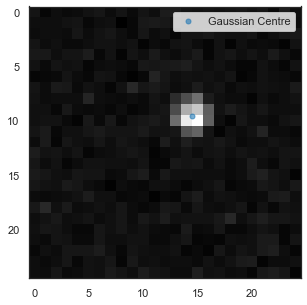

In [28]:
plt.figure(figsize = (5,5))
plt.imshow(simulated, cmap = 'gray');
plt.plot(x0,y0,'o',alpha = 0.6, markersize = 5)
plt.legend(['Gaussian Centre'])
plt.savefig(figfile+"MLE_gaussfit_localized_offcentred.png",dpi=300)
plt.show()

In [29]:
y_ccd_point, x_ccd_point = anl.transform_ccd_coords(pic,scale_true,ccd_scale,200,300)
print('Xtrue:',np.round(x_ccd_point,decimals = 3), '| Ytrue:',np.round(y_ccd_point,decimals = 3))

Xtrue: 14.525 | Ytrue: 9.525


That's awesome! You can even visualize the gaussian distribution fit to the image of the point source.

In [30]:
x = np.arange(0, np.shape(simulated)[1], 0.5e-1)
y = np.arange(0, np.shape(simulated)[0], 0.5e-1)
X, Y = np.meshgrid(x, y)
reconstructed = anl.gaussian2d_symm((X,Y),A,x0,y0,sigma,offset,ravel=False)

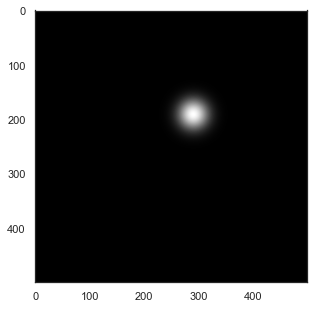

In [31]:
plt.figure(figsize = (5,5))
plt.imshow(reconstructed, cmap = 'gray')
plt.savefig(figfile+"MLE_gaussfit_reconstructed_offcentred.png",dpi = 300);

### Comparing `anl.gauss_fit_MLE` with `gaussfit2DMLE.m`

In [32]:
image = np.loadtxt('MATLAB_scripts/simulated_img_off_centre.txt')

In [33]:
A,x0,y0,sigma,offset,_ = anl.gauss2_fit_MLE(image)
print(A, x0, y0, sigma, offset)

Sucess: True
126.79782361918284 14.547896989266661 9.625064481648007 0.9422474312059179 10.100212624195649


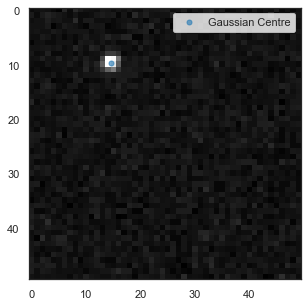

In [34]:
plt.figure(figsize = (5,5))
plt.imshow(image, cmap = 'gray');
plt.plot(x0,y0,'o',alpha = 0.6, markersize = 5)
plt.legend(['Gaussian Centre'])
plt.show()

Matches with `gaussfit2DMLE.m`!